<h1 style='color: red'> New Datasets</h1>
<p> 
Trying new datasets

    * ERA5: /g/data/rt52/era5 <br>
    * GPCC: /g/data/ia39/aus-ref-clim-data-nci/gpcc/data/full_data_
    (https://aus-ref-clim-data-nci.github.io/aus-ref-clim-data-nci/datasets/gpcc.html)
</p>

In [79]:
import sys, os
from importlib import reload

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))
import paths

In [80]:
reload(paths)

<module 'paths' from '/home/563/ab2313/Documents/time_of_emergene_drafts/src/paths.py'>

In [81]:
dir(paths)

['DATA_DIR',
 'ERA5_PATH',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [38]:
paths.DATA_DIR

'/g/data/w40/ab2313/time_of_emergence'

In [142]:
# client.close()
from dask.distributed import Client
client = Client(memory_limit=None, threads_per_worker=1, n_workers=10)
Client()

2024-12-17 17:15:16,616 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/worker.py", line 1269, in heartbeat
    response = await retry_operation(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/utils_comm.py", line 441, in retry_operation
    return await retry(
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/utils_comm.py", line 420, in retry


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/38109/status,
Dashboard: /proxy/38109/status,Workers: 13
Total threads: 52,Total memory: 248.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35115,Workers: 13
Dashboard: /proxy/38109/status,Total threads: 52
Started: Just now,Total memory: 248.00 GiB
Comm: tcp://127.0.0.1:33099,Total threads: 4
Dashboard: /proxy/44385/status,Memory: 19.08 GiB
Nanny: tcp://127.0.0.1:45973,


In [84]:
os.listdir(os.path.join(paths.DATA_DIR, 'era5'))

['2t.zarr', '.ipynb_checkpoints']

In [87]:
ERA5_SAVE_VARIABLES = list(map(lambda x: x.split('.')[0], os.listdir(os.path.join(paths.DATA_DIR, 'era5'))))
ERA5_SAVE_VARIABLES

['2t', '']

In [88]:
'2t' in ERA5_SAVE_VARIABLES

True

In [111]:
def open_era5(var:str) -> xr.DataArray:
    MY_ERA5_PATH = os.path.join(paths.DATA_DIR, 'era5')
    ERA5_SAVE_VARIABLES = list(map(lambda x: x.split('.')[0],os.listdir(MY_ERA5_PATH)))

    if var in ERA5_SAVE_VARIABLES:
        print(' - Variable already converted to zarr')
        return xr.open_zarr(os.path.join(MY_ERA5_PATH, f'{var}.zarr'))

    print(f'New Variables - attempting to open {var} from {paths.ERA5_PATH}')
    data_raw_ds = xr.open_mfdataset(
        os.path.join(paths.ERA5_PATH, var, '*', '*.nc'), 
        chunks={'time':-1, 'lat':721//6, 'lon':1440//12})
                     
    data_ds = data_raw_ds.resample(time='YE').mean()
    return data_ds

In [112]:
paths.ERA5_PATH

'/g/data/rt52/era5/single-levels/monthly-averaged'

In [117]:
import open_data

In [160]:
reload(open_data)

<module 'open_data' from '/home/563/ab2313/Documents/time_of_emergene_drafts/src/open_data.py'>

In [175]:
data_ds2 = open_data.open_era5('cape')#, save=True)

 - Variable already converted to zarr


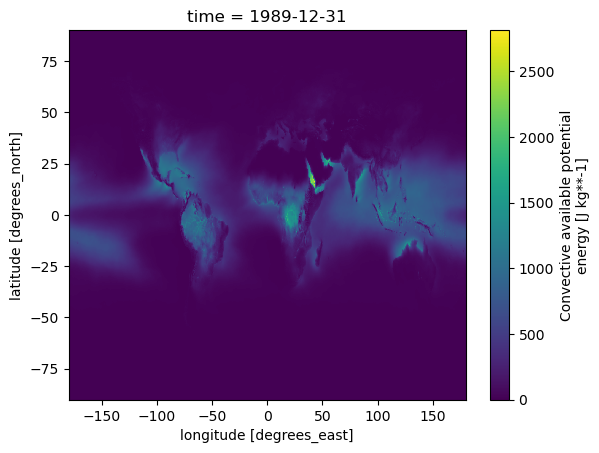

In [177]:
data_ds2.isel(time=30).plot()

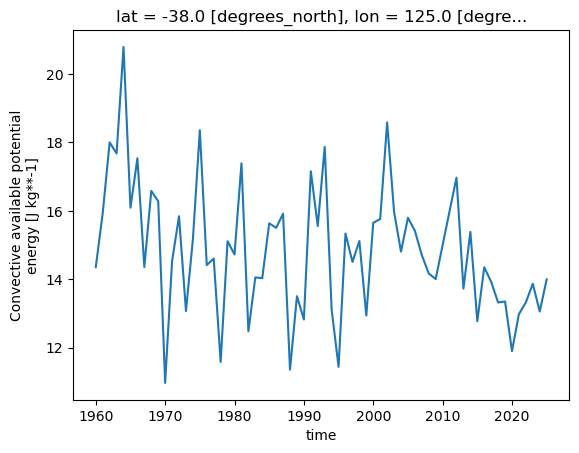

In [176]:
data_ds2.sel(lat=-38, lon=125, method='nearest').plot()

In [161]:
data_ds = open_data.open_era5('cape', return_raw=True, save=False)

New Variables - attempting to open cape from /g/data/rt52/era5/single-levels/monthly-averaged
Returning raw data


In [166]:
data_ds = data_ds.resample(time='YE').mean().compute()

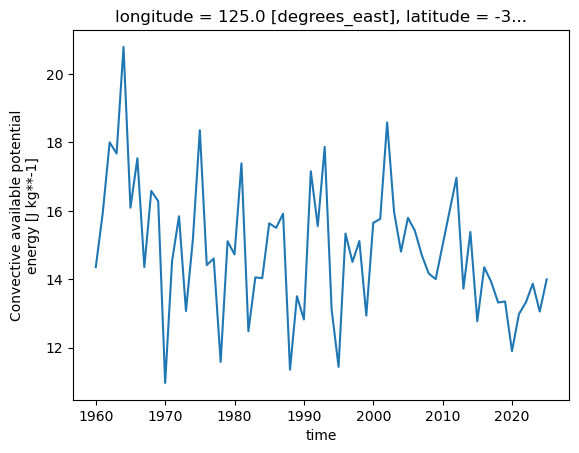

In [167]:
data_ds.cape.sel(latitude=-38, longitude=125, method='nearest').plot()

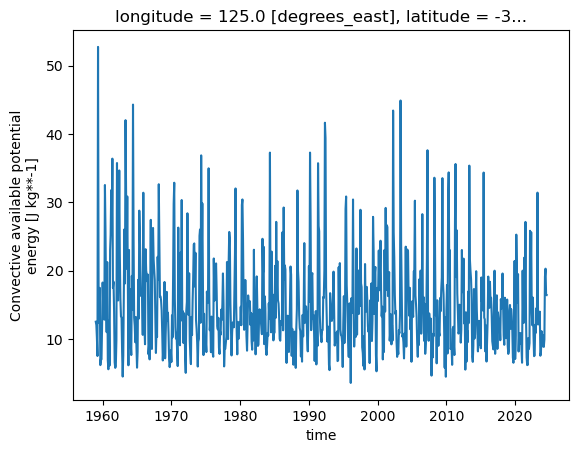

In [164]:
data_ds.cape.sel(latitude=-38, longitude=125, method='nearest').plot()

In [162]:
data_ds

<xarray.Dataset> Size: 7GB
Dimensions:    (time: 788, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2024-08-01
Data variables:
    cape       (time, latitude, longitude) float64 7GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 20:35:51 UTC+1000 by era5_replication_tools-1.10...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels monthly-averaged convective_available_po...

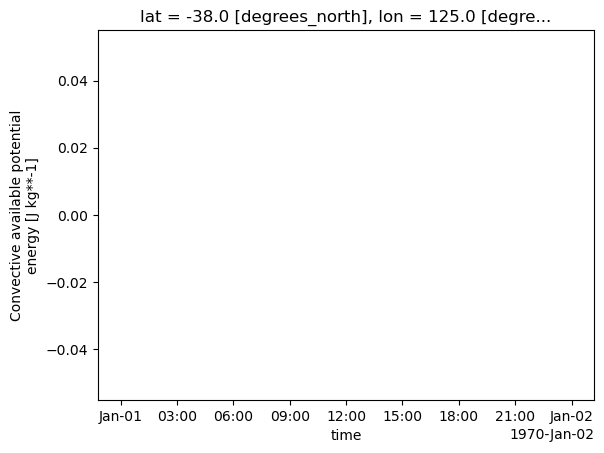

In [159]:
data_ds.sel(lat=-38, lon=125, method='nearest').plot()

In [99]:
open_era5('2t')

 - Variable already converted to zarr


<xarray.Dataset> Size: 548MB
Dimensions:    (latitude: 721, longitude: 1440, time: 66)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 528B 1959-12-31 1960-12-31 ... 2024-12-31
Data variables:
    t2m        (time, latitude, longitude) float64 548MB dask.array<chunksize=(66, 240, 480), meta=np.ndarray>

In [4]:
ERA5_PATH = '/g/data/rt52/era5/single-levels/monthly-averaged' #reanalysis'

In [5]:
np.array(os.listdir(ERA5_PATH))

array(['lssfr', 'mlssr', 'viman', 'mp1', 'tvl', 'src', 'deg0l', 'skt',
       '100v', 'viiwn', 'aluvp', 'mvimd', 'wss', 'vst', 'vimd', 'ishf',
       'chnk', 'rhoao', 'sd', 'str', 'ewss', 'mntss', 'tco3', 'swvl1',
       'ttrc', 'mlspr', 'ssr', 'mtdwswrf', 'vimad', 'vithen', 'dctb',
       'alnip', 'cbh', 'fdir', 'sshf', 'i10fg', 'lblt', 'swvl4', '10u',
       'mwp1', 'megwss', 'ltlt', 'dwps', 'e', 'lgws', 'msdrswrf', 'stl4',
       'strd', 'ptype', 'viwvn', 'csfr', 'mssror', 'gwd', 'vitoen', 'cvh',
       'lmlt', 'istl3', 'p2ww', 'tcsw', 'p1ps', 'vima', 'vithe', 'msqs',
       'lai-hv', 'tcw', 'ssrd', 'uvb', 'vipie', 'mcpr', 'slt', 'msl',
       'mmtss', 'mer', 'totalx', 'swh', 'sst', 'mpww', 'vithee', 'tsn',
       '100u', 'dwww', 'tciw', 'blh', 'vimat', 'tclw', 'mwp', 'hcc',
       'mp2', 'ilspf', 'cp', 'nsss', 'pev', 'viwve', 'istl2', 'msr',
       'wdw', 'viec', 'vioze', 'mtnlwrfcs', 'mdts', 'licd', 'msnswrfcs',
       'strdc', 'mwp3', 'stl1', 'ro', 'alnid', 'sf', 'iews', 'bld',
 

In [26]:
client.cluster.scale(52)

In [30]:
data_raw_ds = xr.open_mfdataset(os.path.join(ERA5_PATH, '2t', '*', '*.nc'), 
                           chunks={'time':-1, 'lat':721//6, 'lon':1440//12})

In [33]:
data_raw_ds

<xarray.Dataset> Size: 7GB
Dimensions:    (time: 788, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2024-08-01
Data variables:
    t2m        (time, latitude, longitude) float64 7GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 20:35:50 UTC+1000 by era5_replication_tools-1.10...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels monthly-averaged 2m_temperature 19590101...

In [31]:
data_ds = data_raw_ds.resample(time='YE').mean()

In [34]:
data_ds = data_ds.compute()

In [27]:
data_ds

<xarray.Dataset> Size: 7GB
Dimensions:    (time: 788, latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2024-08-01
Data variables:
    t2m        (time, latitude, longitude) float64 7GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 20:35:50 UTC+1000 by era5_replication_tools-1.10...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 single-levels monthly-averaged 2m_temperature 19590101...

In [10]:
data_ds.t2m

<xarray.DataArray 't2m' (time: 788, latitude: 721, longitude: 1440)> Size: 7GB
dask.array<concatenate, shape=(788, 721, 1440), dtype=float64, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2024-08-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [39]:
os.listdir(paths.DATA_DIR)

['best',
 'large_ensembles',
 '20CR_ACCESS_SSP585.nc',
 'decent',
 'toe_metrics',
 'GPCC',
 'ssp',
 '.ipynb_checkpoints']

In [42]:
os.mkdir(os.path.join(paths.DATA_DIR, 'era5', '2t'))

In [57]:
SAVE_PATH = os.path.join(paths.DATA_DIR, 'era5')#, '2t')
SAVE_PATH

'/g/data/w40/ab2313/time_of_emergence/era5'

In [56]:
data_ds = data_ds.chunk({'time':-1, 'latitude':721//3, 'longitude':1440//3}).t2m

In [59]:
data_ds.to_zarr(os.path.join(SAVE_PATH, '2t.zarr'), mode='w')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 522.80 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


In [66]:
ds = xr.open_zarr(os.path.join(SAVE_PATH, '2t.zarr')).t2m